# Bank Marketing Data Set


## Objective

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



## Attribute Information:

### Input variables:

### bank client data:
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
# Imports 
import time
start = time.time()
import numpy as np
import pandas as pd 
from pandas import DataFrame
import math
import warnings

#Machine_learning_Imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

#plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

## Loading Data

In [2]:
data_read = pd.read_csv("bank-additional-full.csv", delimiter= ";")
data_read.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Data Summary
data_read.describe(include= 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [4]:
data_read[data_read.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


## Data Visualization

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

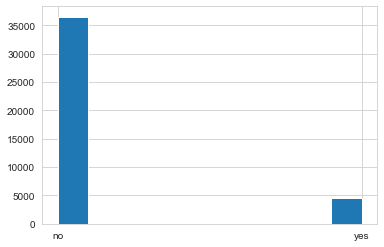

In [5]:
# Distribution of target value
plt.hist(data_read.y)

Checking null values

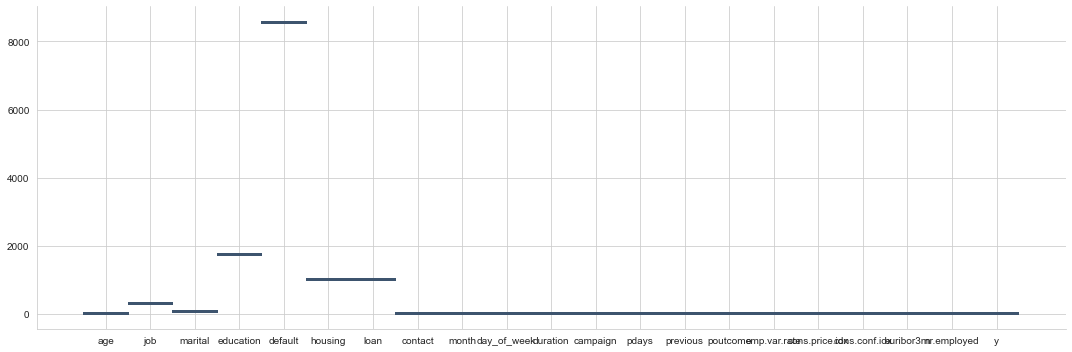

In [6]:
data_check_null = data_read.replace(['unknown'], np.nan)
sns.displot(x = data_read.columns, y= data_check_null.isnull().sum(), aspect = 3)

Default attribute has highest unknown values

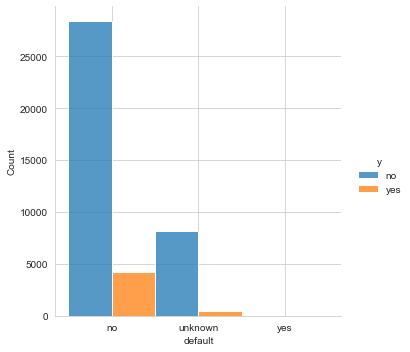

In [7]:
sns.displot(data_read,x ="default",hue="y",multiple="dodge",bins =20)

In [8]:
data_read["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Since default has majority value as no and unknown. It will not help in prediction and it'll be safe to drop this column

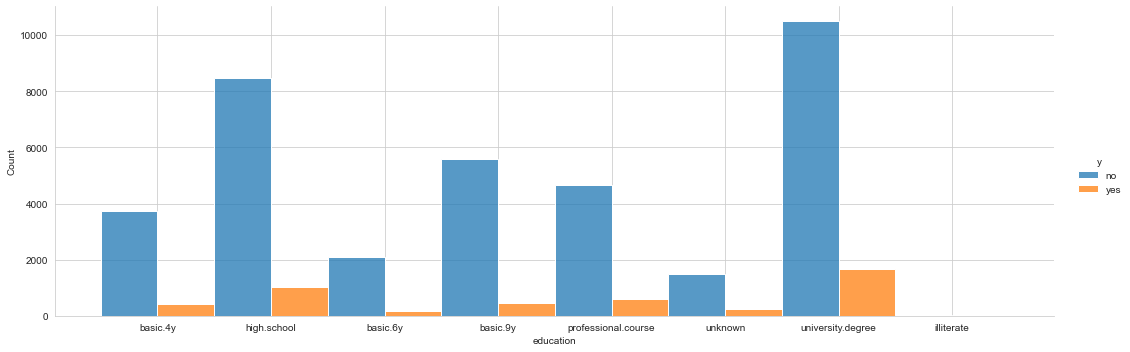

In [9]:
# Now let's foucs education
sns.displot(data_read,x ="education",hue="y",multiple="dodge",bins =20, aspect = 3)

Since, it has approx 1800 unknown value, and this also seems an important aspect for prediction we will try to replace unknwon values with best suitable value.


In [10]:
# let's try to find any correlation using groupby 
data_read.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Findings 
* With increase in call suration chances of yes increases 
* Less pdays results in more yes
* If customer is contacted more number of times previously alos then chances of yes increases 

Let's all three in more detail

#### Duration

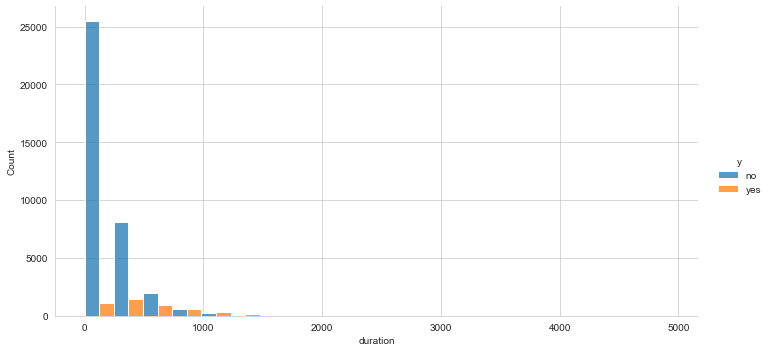

In [11]:
sns.displot(data = data_read , x = "duration", hue = "y",multiple="dodge",bins =20, aspect = 2 )

Duration: This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Benchmarking of duration

In [12]:
cut = [0,15,60,120,240,360,480,600,max(data_read.duration)]
value = [0,1,2,3,4,5,6,7]
data_read["duration"]= pd.cut(data_read["duration"] , bins = cut , labels = value)
data_read["duration"]

0        4
1        3
2        3
3        3
4        4
        ..
41183    4
41184    5
41185    3
41186    5
41187    3
Name: duration, Length: 41188, dtype: category
Categories (8, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6 < 7]

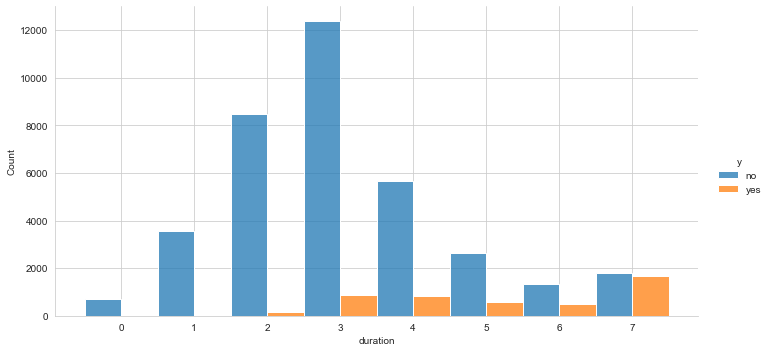

In [13]:
sns.displot(data = data_read , x = "duration", hue = "y",multiple="dodge",bins =20, aspect = 2 )

#### Pdays

<AxesSubplot:xlabel='pdays', ylabel='Count'>

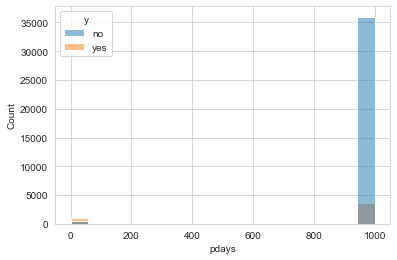

In [14]:
sns.histplot(data = data_read , x = "pdays", hue = "y")

It seems most of the client was not previously contacted(approx 40k). Hence this will not help in predicting and I'll also drop this

#### Previous

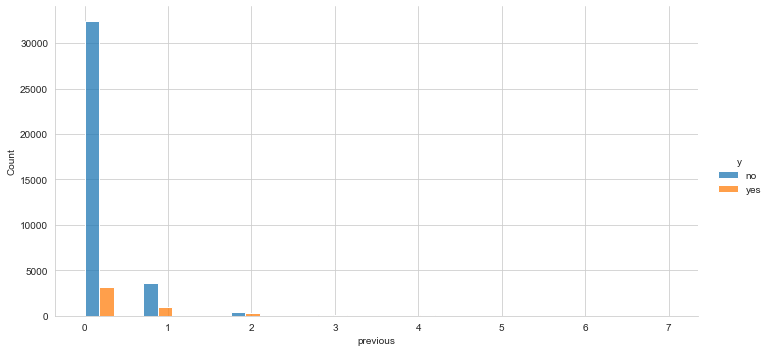

In [15]:
sns.displot(data = data_read , x = "previous", hue = "y" ,multiple="dodge",bins =20, aspect = 2 )

It seems that with increase in number of contacts performed before this campaign, for a particular client, subscription ratio(yes/no) increases

### Few more plots 

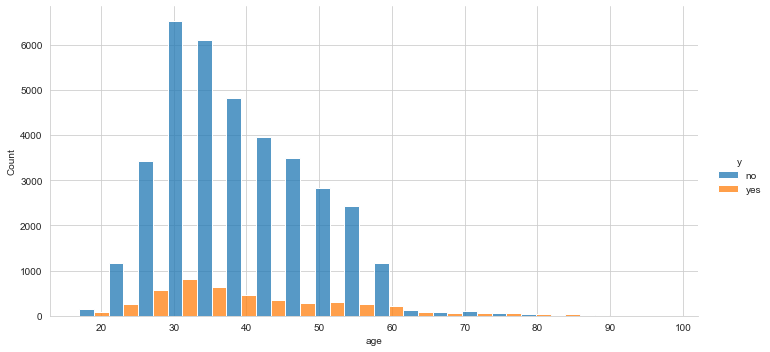

In [16]:
sns.displot(data = data_read , x = "age", hue = "y" ,multiple="dodge",bins =20, aspect = 2 )

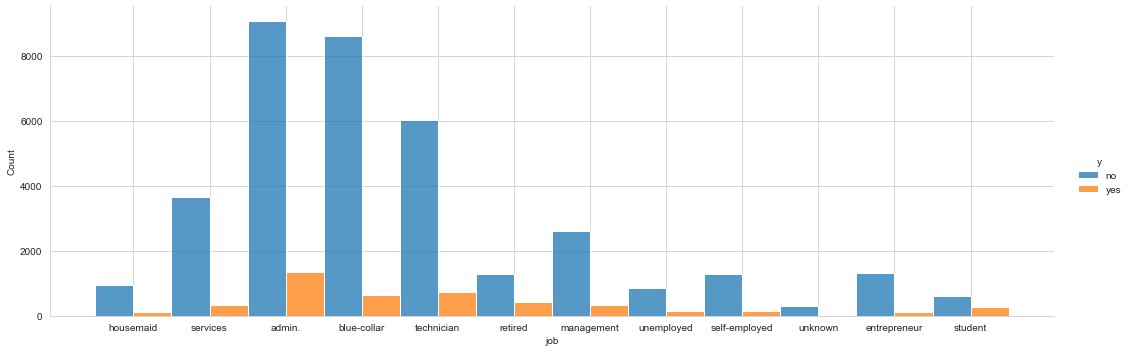

In [17]:
sns.displot(data_read,x ="job",hue="y",multiple="dodge",bins =20, aspect = 3)

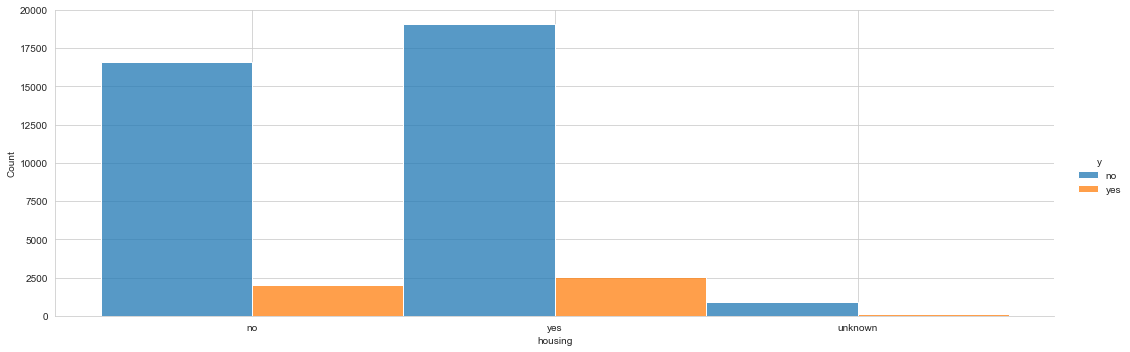

In [18]:
sns.displot(data_read,x ="housing",hue="y",multiple="dodge",bins =20, aspect = 3)

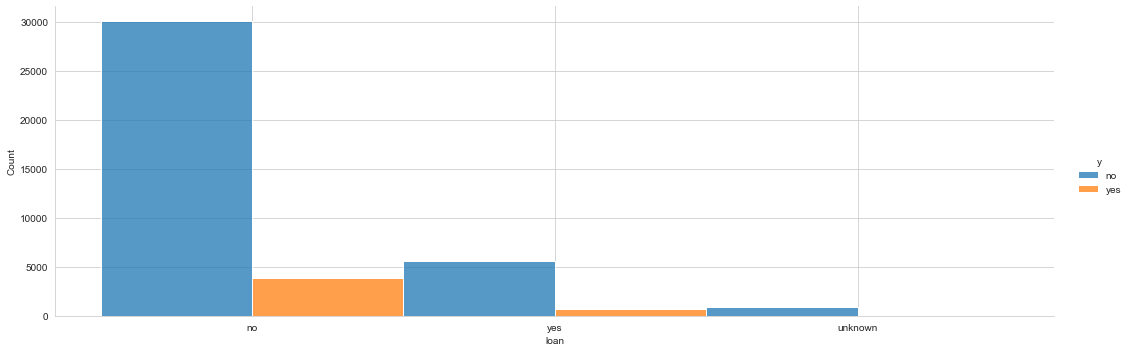

In [19]:
sns.displot(data_read,x ="loan",hue="y",multiple="dodge",bins =20, aspect = 3)

# Data Preparation

Since the data has "unknown" values in it. It'd be easlier to handling unknown value if they are null


In [20]:
data_temp = data_read.replace(['unknown'], np.nan)
#data_temp = data_temp.drop(["default", "duration"], axis = 1)
data_temp = data_temp.drop(["default", "pdays"], axis = 1)

data_temp

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,4,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,3,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,3,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,3,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,4,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,4,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,5,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,3,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,5,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [21]:
data_temp.isnull().sum()

age                  0
job                330
marital             80
education         1731
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             4
campaign             0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [22]:
#deleting rows having three or more null values 
data_temp = data_temp.dropna(thresh=17)

In [23]:
data_temp.isnull().sum()

age                  0
job                320
marital             74
education         1686
housing            946
loan               946
contact              0
month                0
day_of_week          0
duration             4
campaign             0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Since unknown value for job and marital is very less. I'll alos drop all the rows with unknown values w.r.t these attributes 


In [24]:
data_temp = data_temp.dropna(subset = ["job","marital"]) 
data_temp.isnull().sum()

age                  0
job                  0
marital              0
education         1558
housing            946
loan               946
contact              0
month                0
day_of_week          0
duration             4
campaign             0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [25]:
# Now let's focus on education 
data_read["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

It can be observed that with increse in education subscription of term deposit is increasing. Also for basic.9y conversion ratio is least 

Hence I'll replace the unknwon education value with university degree if yes and basic.9y if no


In [26]:
#edu_var = data_read["education"].unique()

In [27]:
data_temp = data_temp.replace([np.nan],"unknown")

data_temp['education'].replace("unknown", data_temp['education'].mode()[0], inplace = True)

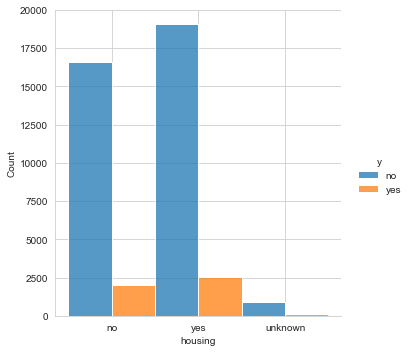

In [28]:
sns.displot(data_read,x ="housing",hue="y",multiple="dodge",bins =20)

In [29]:
data_temp['housing'].replace("unknown", data_read['housing'].mode()[0], inplace = True)


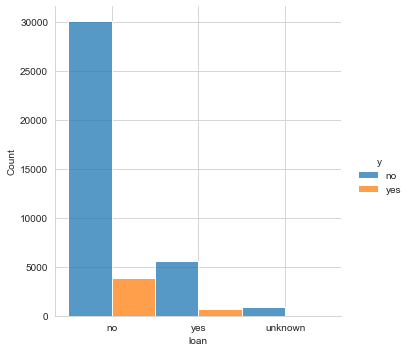

In [30]:
sns.displot(data_read,x ="loan",hue="y",multiple="dodge",bins =20)

In [31]:
data_temp['loan'].replace("unknown", data_read['loan'].mode()[0], inplace = True)

In [32]:
data_temp= data_temp.replace(["unknown"],np.nan)
data_temp.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          4
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [33]:
data_temp = data_temp.dropna()

## Dealing with categorical data

In [34]:
dummy_data1 = data_temp

#dummy_data1 = dummy_data1.dropna()
df_target_edu = dummy_data1["education"]

# I"ll use dummy_data1 to train my model 
# we dont need education,y in dummy_data1
dummy_data1 = dummy_data1.drop("y",axis =1)

cat_vars=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dummy_data1[var], prefix=var)
    dummy_data1=pd.concat([dummy_data1,cat_list],axis=1)

new_cat=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']
dummy_data1 = dummy_data1.drop(new_cat,axis =1)

In [35]:
dummy_data1

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,4,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,3,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,3,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,3,1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,4,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,4,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,5,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,3,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,5,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0


In [36]:
data_temp['y'].replace("no", 0, inplace = True)
data_temp['y'].replace("yes", 1, inplace = True)

In [37]:
X = dummy_data1
y = data_temp["y"]

In [38]:
#Test_train_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y)


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

DT_cls = DecisionTreeClassifier()

In [40]:
def choose_max_depth(X,y):
    depth = 1
    breaker = 0
    i = 0
    curr_score = 0
    num = len(X.columns)
    while breaker ==0:
        DT_cls = DecisionTreeClassifier(max_depth=i+1,random_state=0)
        DT_cls.fit(X_train,Y_train)
        score = DT_cls.score(X_test,Y_test)
        if score>curr_score:
            depth +=1
            i = i+1
            curr_score = score
        elif score<curr_score:
            breaker +=1
    return(depth)        

In [41]:
depth = choose_max_depth(X_train,Y_train)
depth

3

In [42]:
DT_cls = DecisionTreeClassifier(max_depth=depth,random_state=0)
DT_cls.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [43]:
score =DT_cls.score(X_test,Y_test)
score

0.9008540296456268

# Random Forest 

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
RF_clf = RandomForestClassifier()

In [46]:
RF_clf.fit(X_train,Y_train)

RandomForestClassifier()

In [47]:
score_RF = RF_clf.score(X_test,Y_test)
score_RF

0.9094924904289781

# Naive Bayes

## Bernoulli_NB

In [48]:
from sklearn.naive_bayes import BernoulliNB

In [49]:
Bernoulli_NB_clf = BernoulliNB()

In [50]:
Bernoulli_NB_clf.fit(X_train,Y_train)

BernoulliNB()

In [51]:
Bernoulli_NB_clf.score(X_test,Y_test)

0.8368508883871602

## Gaussian_NB

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
Gaussian_NB_clf = GaussianNB()


In [54]:
Gaussian_NB_clf.fit(X_train,Y_train)


GaussianNB()

In [55]:
Gaussian_NB_clf.score(X_test,Y_test)

0.8527535093746932

## Model 2 :
### Multicollinearity Consideration

Now we need to get rid of a few columns. We will be dropping one column from each dummy varibale to avoid multicollinearity

In [56]:
data_mul = dummy_data1

In [57]:
drop_list = ['job_entrepreneur','marital_divorced','housing_no','loan_no','contact_telephone','month_aug','day_of_week_mon','poutcome_nonexistent']
data_mul = data_mul.drop(drop_list,axis = 1)
X_mul = data_mul
y_mul = data_temp["y"]

In [58]:
X_train_mul, X_test_mul, Y_train_mul, Y_test_mul = train_test_split(X_mul,y_mul)

In [59]:
DT_cls_2 = DecisionTreeClassifier()

depth = choose_max_depth(X_train_mul,Y_train_mul)
depth

3

In [60]:

DT_cls_2.fit(X_train_mul, Y_train_mul)

DecisionTreeClassifier()

In [61]:
score =DT_cls_2.score(X_test_mul,Y_test_mul)
score

0.8911357612643566

No progress!!

## Model 3:

### Filling unknown value using logistic multi-class classification model

#### Finding correlation 

In [62]:
data_temp_cat = data_read

In [63]:

cat_variable=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']

for var in cat_variable:
    arr = data_temp_cat[var].unique()
    with_dict = {}
    i = 1
    for element in arr:
        with_dict[element] = i
        i += 1
    data_temp_cat = data_temp_cat.replace(with_dict)

In [64]:
data_temp_cat.corr(method='pearson', min_periods=1)["education"]

age              -0.111885
job               0.222370
marital           0.064451
education         1.000000
default          -0.160724
housing           0.015293
loan              0.003654
contact           0.101812
month             0.112405
day_of_week       0.005554
duration         -0.010637
campaign         -0.001961
pdays            -0.028917
previous          0.015948
poutcome          0.021126
emp.var.rate     -0.032797
cons.price.idx   -0.088454
cons.conf.idx     0.064458
euribor3m        -0.022851
nr.employed      -0.019656
y                 0.040122
Name: education, dtype: float64

In [65]:
var_to_consider = ["job", "month" , "cons.conf.idx" ,"marital", "previous","y"]
sub_data = data_temp[var_to_consider]

sub_data

,job,month,cons.conf.idx,marital,previous,y
0,housemaid,may,-36.4,married,0,0
1,services,may,-36.4,married,0,0
2,services,may,-36.4,married,0,0
3,admin.,may,-36.4,married,0,0
4,services,may,-36.4,married,0,0
...,...,...,...,...,...,...
41183,retired,nov,-50.8,married,0,1
41184,blue-collar,nov,-50.8,married,0,0
41185,retired,nov,-50.8,married,0,0
41186,technician,nov,-50.8,married,0,1


In [66]:
var_for_dummy = ["job", "month" ,"marital","y"]

for var in var_for_dummy:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(sub_data[var], prefix=var)
    sub_data=pd.concat([sub_data,cat_list],axis=1)

to_drop =["job", "month" ,"marital", "y"]
sub_data = sub_data.drop(to_drop,axis =1)

In [67]:
X_edu = sub_data

replace_dict = {'basic.4y':1, 'high.school':2, 'basic.6y':3, 'professional.course':4,
       'basic.9y':5, 'university.degree':6, 'illiterate':7}
Y_edu = data_temp["education"].replace(replace_dict)

In [68]:
X_edu_train , X_edu_test, Y_edu_train, Y_edu_test = train_test_split(X_edu,Y_edu)

In [69]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_edu_train, Y_edu_train)

C:\Users\AMAN-PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
log_reg.score(X_edu_test, Y_edu_test)

0.5126141160302347

In [71]:
data_edu = data_read[var_to_consider]

In [72]:
data_edu_target = data_read["education"]

In [73]:
var_for_dummy = ["job", "month" ,"marital","y"]

for var in var_for_dummy:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_edu[var], prefix=var)
    data_edu=pd.concat([data_edu,cat_list],axis=1)

to_drop =["job", "month" ,"marital", "y"]
data_edu = data_edu.drop(to_drop,axis =1)

data_edu = data_edu.drop(["marital_unknown", "job_unknown"], axis = 1)


In [74]:
copy_data_read = data_read # Making a copy of original data 

In [75]:
for i in range(len(data_read)):
    if copy_data_read["education"][i] == "unknown":
        copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])

<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu

<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu

<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu

<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu

<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu

<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu

<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu

<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu

<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu.iloc[i]])
<ipython-input-75-41935f04fb57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data_read["education"][i] = log_reg.predict([data_edu

In [76]:
copy_data_read = copy_data_read.replace(['unknown'], np.nan)

C:\Users\AMAN-PC\anaconda3\lib\site-packages\pandas\core\missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [77]:
copy_data_read.isnull().sum()

age                  0
job                330
marital             80
education            0
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             4
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [78]:
copy_data_read = copy_data_read.drop(["default", "pdays"], axis = 1)
copy_data_read = copy_data_read.dropna(thresh=17)
copy_data_read = copy_data_read.dropna(subset = ["job","marital"])
copy_data_read['loan'].replace("unknown", copy_data_read['loan'].mode()[0], inplace = True)
copy_data_read['housing'].replace("unknown", copy_data_read['housing'].mode()[0], inplace = True)


In [79]:
# Creating Dummy Data 
dummy_data_copy = copy_data_read.dropna()

dummy_data_copy = dummy_data_copy.dropna()
df_target_edu = dummy_data_copy["education"]

# I"ll use dummy_data_copy to train my model 
# we dont need education,y in dummy_data_copy
dummy_data_copy = dummy_data_copy.drop("y",axis =1)

cat_vars=['job','marital','housing','loan','contact','month','day_of_week','poutcome']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dummy_data_copy[var], prefix=var)
    dummy_data_copy=pd.concat([dummy_data_copy,cat_list],axis=1)

new_cat=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']
dummy_data_copy = dummy_data_copy.drop(new_cat,axis =1)


In [80]:
copy_y = copy_data_read.dropna()["y"]

In [81]:
copy_X = dummy_data_copy
copy_y.replace("no", 0, inplace = True)
copy_y.replace("yes", 1, inplace = True)
copy_X_train, copy_X_test, copy_Y_train, copy_Y_test = train_test_split(copy_X,copy_y)

C:\Users\AMAN-PC\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#### Decision Tree 

In [82]:
copy_DT_cls = DecisionTreeClassifier()
copy_DT_cls = DecisionTreeClassifier(max_depth=depth,random_state=0)
copy_DT_cls.fit(copy_X_train, copy_Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [83]:
copy_DT_cls.score(copy_X_test , copy_Y_test)

0.9087437185929649

#### Random Forest

In [84]:
copy_RF_clf = RandomForestClassifier()
copy_RF_clf.fit(copy_X_train, copy_Y_train)
copy_RF_clf.score(copy_X_test, copy_Y_test)

0.9082412060301508

#### Naive Bayes

In [85]:
copy_Gaussian_NB_clf = GaussianNB()
copy_Gaussian_NB_clf.fit(copy_X_train , copy_Y_train)
copy_Gaussian_NB_clf.score(copy_X_test, copy_Y_test)

0.8576884422110552

### Performance Evaluation

In [86]:
from pandas import DataFrame
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


classifiers = [DT_cls, RF_clf , Gaussian_NB_clf]

def Performance_Evaluation(classifiers, X_train, X_test, y_train, y_test):
    classifier_name = ["Decision Tree", "Random Forest" , "Naive Bayes"]
    scores = ["Accuracy", "Precision", "recall" ]
    n = len(classifiers)
    df = DataFrame(np.zeros(n*n).reshape(n,n))
    DataFrame(df , columns = classifier_name, index =scores)
    
    for clf in classifiers:
        i = classifiers.index(clf)
        cv_result = cross_validate(clf, X_test, y_test, cv=5)
        accuracy = np.mean(cv_result["test_score"])
        df[i][0] = accuracy
        df[i][1] = precision_score(clf.predict(X_test), y_test)
        df[i][2] = recall_score(clf.predict(X_test), y_test)
        df[i][3] = f1_score(clf.predict(X_test), y_test)
        
    return(df)
    

In [87]:
classifiers = [DT_cls, RF_clf , Gaussian_NB_clf]
perform_matrix = Performance_Evaluation(classifiers, X_train, X_test, Y_train, Y_test)
perform_matrix.rename(columns = {0:"Decision Tree" , 1:"Random Forest" , 2:"Naive Bayes" } , inplace = True)
perform_matrix.rename(index = {0:"Accuracy" , 1:"Precision" , 2:"Recall"} , inplace = True)
perform_matrix

,Decision Tree,Random Forest,Naive Bayes
Accuracy,0.904387,0.907626,0.859722
Precision,0.540018,0.445910,0.503958
Recall,0.557675,0.634543,0.379722


#### Performance Evaluation when unknown value using logistic multi-class classification model

In [88]:
classifiers_edu = [copy_DT_cls, copy_RF_clf , copy_Gaussian_NB_clf]

perform_matrix_2 = Performance_Evaluation(classifiers_edu, copy_X_train, copy_X_test, copy_Y_train, copy_Y_test)
perform_matrix_2.rename(columns = {0:"Decision Tree" , 1:"Random Forest" , 2:"Naive Bayes" } , inplace = True)
perform_matrix_2.rename(index = {0:"Accuracy" , 1:"Precision" , 2:"Recall"} , inplace = True)
perform_matrix_2

,Decision Tree,Random Forest,Naive Bayes
Accuracy,0.905427,0.908643,0.854472
Precision,0.374532,0.449438,0.484082
Recall,0.625000,0.596273,0.374096


In [89]:
end = time.time()

print(f"Total run time: {(end-start)} seconds" )

Total run time: 84.11542582511902 seconds
